In [19]:
import pandas as pd
import numpy as np
# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


<h1 style="font-size: 60px; color: blue; text-align:center">Analyzing Fatal Police Shootings in the US Since 2015</h1>


<h1 style="font-size: 30px; color: red; text-align:center">Author: Ryan Harth</h1>

# INTRODUCTION

The following is an analysis on law enforcement shootings over the past 7-years in the United States where the individual shot died. 

The Rule of Law is a critical fiber within the fabric of of US society and is largely what keeps much of daily life safe and functioning. 

The Rule of Law is enforced through policing and has come under intense scrutinay in the last 3-5 years largely due to high-profile events many of which include law-enforcement involved shootings. Especially those where the individual died. 

Despite these events actually being extremely rare from a statistical perspective, each one tends to have a tremendous impact (at least for the initial time period) on society. Protests, riots, and other events along with impact on elections and ultimately how people feel in their daily lives are all a direct result of these events. 

Better understanding what is occuring from a "math" & "data" perspective that is objective has the potential to abate much of the fear and to help drive a realisitic discussion on how to at least reduce and at best eliminate these type of encounters. 

## WHY THIS DATA?

I chose this data because I have a stong interest in law enforcement and more speciffically refinment of policing. 

I was a police officer for 3-years, my father was a police officer for 28-years, and my great grandfather was a Chicago Police officer.  

I have done previous statistical/analytical academic research into violence in the US and I remain passionate about the topic. 

My previous research into violence was geographically based. I would like to sort this data based on loaction and conduct analysis from there on the variables available (armed, mental illness, age, fleeing, body camera) and build regression models to determine and statistical signifigance between the variables. 

## HYPOTHESIS

Broadly speaking, I want to better understand the variables that impact law enforcement engagements that end up in fatal shootings. What are the ACTUAL contributing factors based on math & data? If we can better understand this then it might be possible to better inform law enforcement officers, so that they understand the TRUE contributing factors to these engagements ending in a death in order to avoid that outcome. 

### Hypothesis = There will be a correlation between the age, gender, and race of the indivdual. The percentage by race of individuals shot and skilled will be generally within the population precentages when observed in specific geographic areas. 

## What hunch(es) did you have about the data?

- Most of the individuals will be male
- Most of the individuals will have been armed
- Most of the individuals will be white
- The majority of the shootings will have occured in major metro areas (population over 100k)
- Most of the individuals were not fleeing
- The average age of the individuals will be 37

# DATA EXPLAINED

### Link to Data Set: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

### The data was collected by the Washington Post by culling local news reports, law enforcement websites and social media, and by monitoring independent databases such as Killed by Police and Fatal Encounters.

The data set is a log of every fatal law enforcement involved shooting from 2015-present built by the Washington Post.

The data includes the age, gender, and race of the indivudal killed as well as the date and location of the incident. Further, the data includes the manner of death, whether there were signs of mental illness, the individual was fleeing, and if the police officer had on a body camera. 

## HOW I CLEANED THE DATA

For the initial EDA, I dropped the id, & location columns (I plan to add the location columns back in a later time)

I checked for duplicates and found none

I dropped the name column

Because the columns with missing values are all strings except age, I replaced the NaN values with a "U" for unknown (0 in age)

Because less than 2% of the individuals have a 0 age, I dropped those rows

In [21]:
df = pd.read_excel('fatal-police-shootings-data.xlsm')
df.drop('id', inplace=True, axis=1)
df.drop('longitude', inplace=True, axis=1)
df.drop('latitude', inplace=True, axis=1)
df.drop('is_geocoding_exact', inplace=True, axis=1)
# Fill in all NaN with 'U'
df['name'] = df['name'].fillna('U')
# Drop all the 'U' values and put it into a new DF
df_duplicates = df.drop(df[df['name'] == 'U'].index, inplace = True )
# Pull out any duplicates
fd_duplicates = df[df['name'].duplicated() == True]
# Now that I know there are no duplicates I will drop the name column
df.drop('name', inplace=True, axis=1)
# I am going to replace the NaN values with a "U" for unknown (0 in age)
df['armed'] = df['armed'].fillna('U')
df['age'] = df['age'].fillna(0)
df['gender'] = df['gender'].fillna('U')
df['race'] = df['race'].fillna('U')
df['flee'] = df['flee'].fillna('U')
# I have to convert the age column to int
df['age'] = df['age'].astype(int)

## DATA DICTIONARY

### - 'date' = The date that the shooting occured (datetime64[ns])
### - 'manner_of_death' = indicates wether the individual was "shot" or "shot and tasered" (string)
### - 'armed' = subject had a weapon ("type") or "unarmed" (string)
### - 'age' = subjects age when they died (float64)
### - 'gender' = subjects biological gender "M" or "F" (string)
### - 'race' = White "W", Asian "A", Hispanic "H", or Black "B" (string)
### - 'city' = location of the shooting (string)
### - 'state' = location of the shooting (string)
### - 'signs_of_mental_illness' = "TRUE" or "FALSE" (bool)
### - 'threat_level' = "attack", "undetermined", "other" (string)
### - 'flee' = "method" or "Not fleeing" (string)
### - 'body_camera' = "TRUE" or "FALSE" (bool)

# DATA --> FLOW --> FINDINGS

Read in your final data. 

Include code that shows your most important findings. 

Select at least five analytical processes that highlight your data and your findings. 

Remember that what you are showing in code is related to your hypotheses/hunches. 

This section is a combination of code and a summary of findings. 

Note that all findings should be clearly written in Markdown cells and should be adjacent to the code cells being explained. 

In [22]:
df3 = pd.read_excel('430_Project_FINAL_HARTH.xlsx')
df3

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6941,2022-07-11,shot,undetermined,27,M,U,Mason,OH,False,undetermined,U,False
6942,2022-07-12,shot,gun,65,M,U,Clearcreek Township,OH,False,attack,U,False
6943,2022-07-13,shot,undetermined,20,M,U,Minneapolis,MN,False,undetermined,U,False
6944,2022-07-13,shot,knife,20,M,U,Henrico County,VA,True,other,U,True


### Because less than 2% of the individuals have a 0 age, I am going to drop those rows. The data will still be statistically signifigant and I plan on continuing with this project beyond the course. I can probably identify most if not all of the ages via a Google search later on down the road. 

In [23]:
df2 = df.loc[df["age"] > 0]
age_zero2 = (df2['age'] == 0).sum()
print(age_zero2)

0


### So, after dropping the 0 ages, the mean age didnt change that drastically (shifting to 37 from 36). The middle 50% is still 27-45, which indicates that the 0 values were really only shifting the mean slightly. 

In [24]:
df2['age'].describe()

count    7041.000000
mean       37.120011
std        12.927516
min         2.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

### Building a density plot:

<Figure size 1152x576 with 0 Axes>

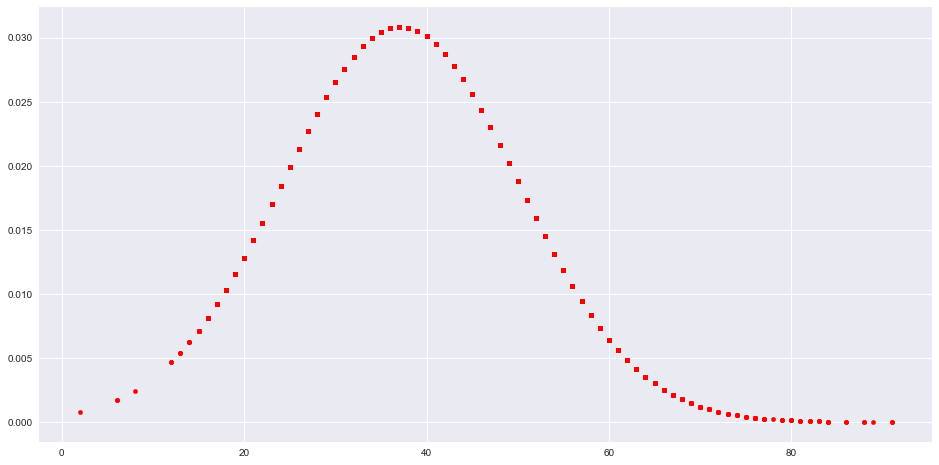

In [25]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

x = df2['age']
y = pdf(x)

# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (16, 8))
plt.scatter( x, y, marker = 'o', s = 20, color = 'red')
plt.show()

### The density plot shows a heavy skew to the right even after removing the 0 ages.

### Getting a better macro view using a boxplot in Seaborn:

<Figure size 1296x288 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Ages of Individuals who were Shot & Killed by LE 2015 - Present Day')

Text(0.5, 0, 'Individual Age')

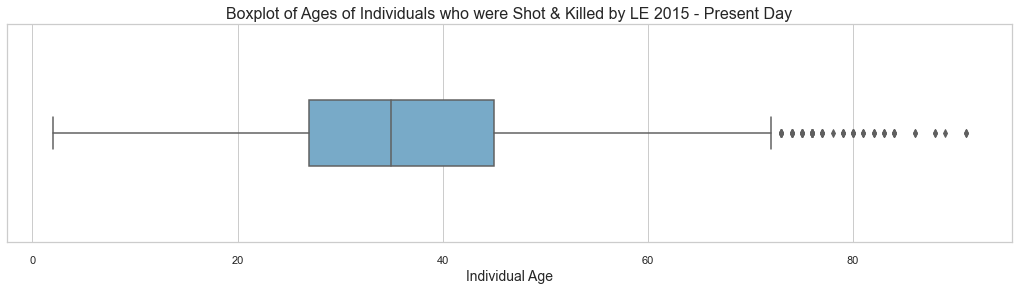

In [26]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 4))
boxplot = sns.boxplot( x=df2["age"], palette="Blues", width=0.3 )
boxplot.axes.set_title("Boxplot of Ages of Individuals who were Shot & Killed by LE 2015 - Present Day", fontsize=16)
boxplot.set_xlabel("Individual Age", fontsize=14)
plt.show()

## This a solid plot that tells a story. 

### 1 - The range of actual ages is far more signifigant that I had originally thought. Its not just 1-2 outliers causing the range to run from 2 to 91. 

### 2 - 50% of the individuals on the list reside between 27-45, which is generally what I expected

### 3 - Using just the "age" column, It is very difficult to say with certainty that a police officer will be more likely to fataly engage with an individual of a specific age. We can say with 95% certainty that if a LEO fataly engages with an individual that they will be between the ages of 11 & 63. However, in terms of leveraging a statisticaly signifigant statement to help better inform law enforcement it is clear that children and elderly could still create a situation that ends with a fatality. 

## Using a violin plot to better visualize the spread and range of ages:

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Violinplot of Ages of Individuals who were Shot & Killed by LE 2015 - Present Day')

Text(0.5, 0, 'Individual Age')

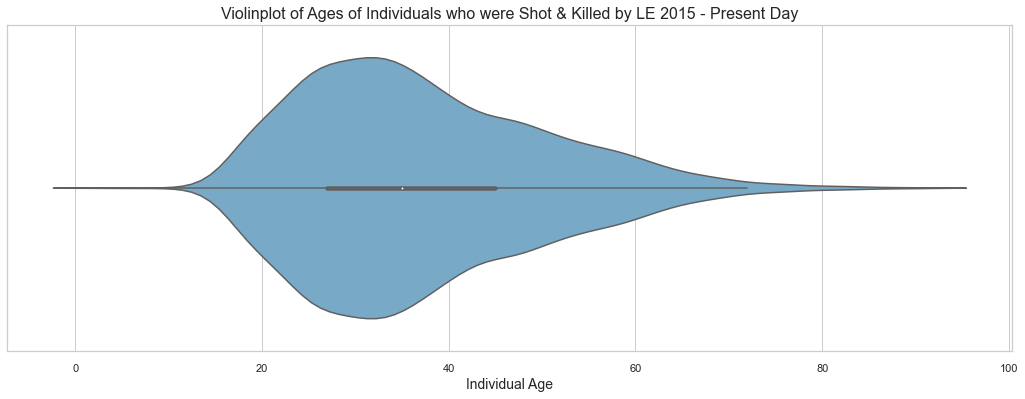

In [27]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 6))
violinplot = sns.violinplot( x=df2["age"], palette="Blues" )
violinplot.axes.set_title("Violinplot of Ages of Individuals who were Shot & Killed by LE 2015 - Present Day", fontsize=16)
violinplot.set_xlabel("Individual Age", fontsize=14)
plt.show()

### I actually prefer the violin plot in the instance. It better visualizes the 95% probability and the spread at each specific age across the full range. 

## Creating a histogram for further visual analysis:

<Figure size 1296x720 with 0 Axes>

Text(0.5, 1.0, 'Histogram of Ages of Individuals who were Shot & Killed by LE 2015 - Present Day')

Text(0.5, 0, 'Individual Age')

([<matplotlib.axis.XTick at 0x7fa1630994e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

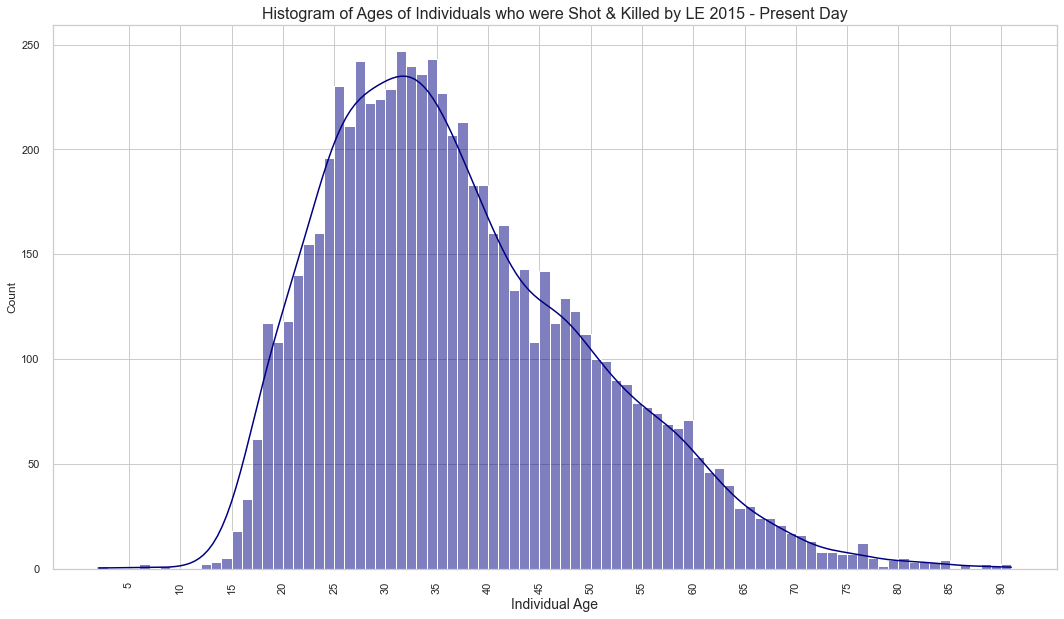

In [28]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))
histogram = sns.histplot(x=df2["age"], color="Navy", bins=89, kde=True)
histogram.tick_params(axis="x", labelrotation=90)
histogram.axes.set_title("Histogram of Ages of Individuals who were Shot & Killed by LE 2015 - Present Day", fontsize=16)
histogram.set_xlabel("Individual Age", fontsize=14)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.show()

### The histogram provides a much more granular look at each age across the range. The first thing that stands out is skew to the right, which indicates there are signifgantly more "elderly" (elderly = age >70) than ther are children if we define a "child" as having an age < 15. 

### Looking more closely at the under 15 age values:

In [29]:
age_column = df2['age']
age_column
age_column.info()

#Looking at the numbers for under 15 years old:
under15 = df2[df2['age'] < 15]
under15['age'].info()

0       53
1       47
2       23
3       32
4       39
        ..
7555    27
7556    65
7557    20
7559    20
7561    31
Name: age, Length: 7041, dtype: int64

<class 'pandas.core.series.Series'>
Int64Index: 7041 entries, 0 to 7561
Series name: age
Non-Null Count  Dtype
--------------  -----
7041 non-null   int64
dtypes: int64(1)
memory usage: 368.1 KB
<class 'pandas.core.series.Series'>
Int64Index: 14 entries, 833 to 7449
Series name: age
Non-Null Count  Dtype
--------------  -----
14 non-null     int64
dtypes: int64(1)
memory usage: 224.0 bytes


### 14 individuals out of 7041 under the age of 15:

In [30]:
percentBelow15 = (14/7041)*100
print(f"{percentBelow15:.2f}% of indiviuals fataly shot by LE since 2015 are under the age of 15.")

0.20% of indiviuals fataly shot by LE since 2015 are under the age of 15.


### So, less than 1% of all individuals are below the age of 15.

## CONCLUSION ON "AGE"

### Being that the age column is the only numerical value set in my data frame I wanted to drill down and understand what i soccuring at a granular level. I also wanted to be sure I had appropriately cleaned the data for further analysis (regression) as part of a larger model. 

### There were no major suprises, but a few smaller things that I was not expecting. 

### Moving forward, this portion of the data set should be a great variable to leverage as part of the regression analysis. 

In [31]:
df2['gender'].value_counts()

M    6710
F     326
U       5
Name: gender, dtype: int64

In [33]:
percentMale = (6710/7041)*100
percentFemale = (326/7041)*100
print(f"Of the 7041 individuals in the data frame who were shot and killed by a LEO since 2015, {percentMale:.2f}% were male and {percentFemale:.2f}% were female. 5 individuals were of unknown gender.")

Of the 7041 individuals in the data frame who were shot and killed by a LEO since 2015, 95.30% were male and 4.63% were female. 5 individuals were of unknown gender.


### This information and analysis confirms my initial assumption that most individuals were male

# Looking at Race

### - 'race' = White "W", Asian "A", or Black "B", Hispanic "H", Other "O", Unknown "U"

In [34]:
df2['race'].value_counts()

W    3093
B    1617
H    1072
U    1013
A     105
N      95
O      46
Name: race, dtype: int64

### There is no identification for what the N column is, so I will remove those 95 individuals from the data frame.

In [35]:
df3 = df2.loc[df["race"] != 'N']
df3['race'].value_counts()
df3

W    3093
B    1617
H    1072
U    1013
A     105
O      46
Name: race, dtype: int64

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,2022-07-11,shot,undetermined,27,M,U,Mason,OH,False,undetermined,U,False
7556,2022-07-12,shot,gun,65,M,U,Clearcreek Township,OH,False,attack,U,False
7557,2022-07-13,shot,undetermined,20,M,U,Minneapolis,MN,False,undetermined,U,False
7559,2022-07-13,shot,knife,20,M,U,Henrico County,VA,True,other,U,True


<Figure size 1296x576 with 0 Axes>

Text(0.5, 1.0, 'Races of Individuals who were Shot & Killed by LE 2015 - Present Day')

Text(0.5, 0, 'Individual Race')

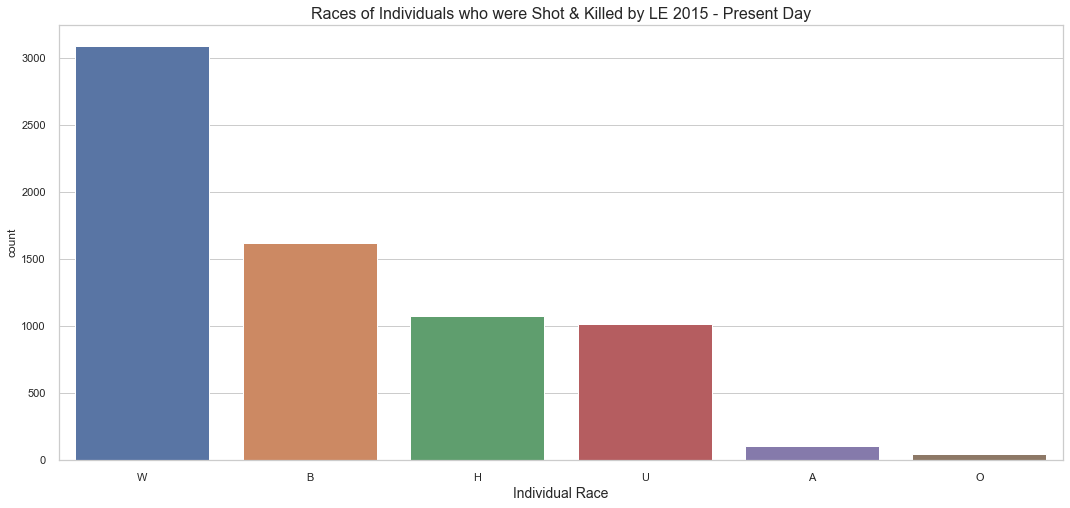

In [36]:
plt.figure(figsize = (18, 8))
barchart = sns.countplot(data=df3, x='race', order=df3.race.value_counts().index )
barchart.axes.set_title("Races of Individuals who were Shot & Killed by LE 2015 - Present Day", fontsize=16)
barchart.set_xlabel("Individual Race", fontsize=14)
plt.show()

In [37]:
# 2020 US CENSUS RACE PERCENTAGE = https://www.census.gov/quickfacts/fact/table/US/RHI125221#RHI125221
white = 59.3 
Hispanic = 18.9
black = 13.6
Asian = 6.1
Other = 2.1
59.3 + 18.9 + 13.6 + 6.1 + 2.1

99.99999999999997

In [38]:
df3['race'].value_counts(normalize=True) * 100

W    44.529225
B    23.279585
H    15.433343
U    14.583933
A     1.511661
O     0.662252
Name: race, dtype: float64

In [39]:
print(f"Of the 7041 individuals shot and killed by a LEO since 2015, 44.5% where white, 23.28% were black, 15.43% were hispanic, 14.58% were unkown, 1.51% were asian, and 0.66% were other")

Of the 7041 individuals shot and killed by a LEO since 2015, 44.5% where white, 23.28% were black, 15.43% were hispanic, 14.58% were unkown, 1.51% were asian, and 0.66% were other


### One of the graphics the Washington Post displays is a comparison of the number of individuals by race per million in the US. 

white = 59.3 vs 44.5 <br>
black = 13.6 vs 23.3 <br>
hispanic = 18.9 vs 15.4 <br>
asian = 6.1 vs 1.5 <br>
other = 2.1 vs 0.6 <br>

### My intention here is not to refute the Post, just to present objective facts.

### I hypothesized that the majority of the individuals would be male and white, which the data supports.

# SUMMARY

Provide a summary of your project. 

After initial exploratory data anlysis there is signifigant potential for further analytics to identify correlation between variables and to look for potential ways to better infrom law enforcement on the most statistically signifigant combination of variables. 

The overall intent of this project is reduce/eliminate fatal police encounters. Eliminating these events may prove to be impossible, but there is certainly room to drastically reduce the amount of fatal encounters through objective data anlysis combined with education and refined policing procedures. (I say this a former law-enforcement officer and career special operations operator)

Educating law enforcement officers on these types of encounters will help them to better identify variables and possibly alter their tactics in a way that still ensures as much safety for them, the individual, and the public. 

## DIFFICULTIES

The largest difficulty in this type of project is that it involes attempting to prduct human behavior through math and data, which requires an equation with variables. Human behavior is impacted, affected, and effected by near infinite variables, which present a conundrum when trying to identify an algorithm for predictive and prescriptive analytics. 

The data set includes some relevant variables, but ultimately much more data is required to ttruly evaluate these encounters. 

Body cameras are a step in the right direction, but they will still never provide a finite number of variables for analysis. 

# CONCLUSION

Data science is pointless without an objective application that provides some type of value or ROI. 

Leveraging data and analytics for good (vs commercialism) is a necessity to continue to improve society and overall quality of life. That is the desired end-state of this study. 

No one should die at the hands of another human, especialy those charged to serve and protect. However, the situations that police officers find themselves in are incredibly dynamic, dangerous, and involve making split-second decisions. Those decision can have impact on a global scale. 

If a small bit of data analysis can positively alter even one of these encounters then the ROI is nearly infinite. 

# NEXT STEPS

The immediate next steps are to perform analytics on the data to identify correlation between variables and then build models to help better inform law enforcement on the statistically relevant combination of variables that lead to fatal encounters with the public. 

Looking at the 0 ages to see if in fact they are pregnant women and then reading them back into the data frame. 

Looking at the outlier engagements in regards to age to ensure they are accurate and either correcting them or eliminating them as necessary. 

As a part of a larger project, looking to collect the available body camera footage and conducting analysis on the data included using machine learning could possibly illuminate variables that humans are not able to percieve. 